## Splines

**Cubic Splines** are piecewise cubic functions which continuous and have first and second derivative equal at the knot points. They are very useful functions for curve fitting and interpolation of data. There are various types of **Cubic Splines** in this notebook we will demonstrate usage of simple cubic splines and natural cubic splines.

Lets first create test data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Make the sheet width 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>" ))

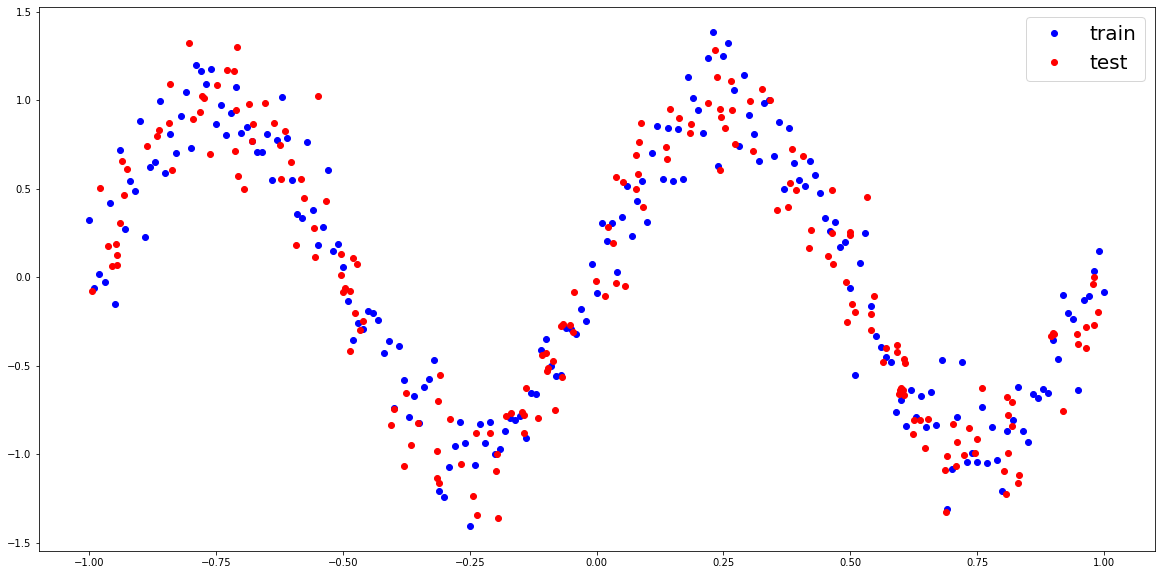

In [31]:
np.random.seed(1)
sigma = 0.2
x_train = np.linspace(-1,1,201)
y_train = np.sin(2*np.pi*x_train) + sigma * np.random.randn(201)

x_test = np.random.uniform(-1,1, size=201)
y_test = np.sin(2*np.pi*x_test) + sigma * np.random.randn(201)

plt.figure(figsize=(20,10))
plt.plot(x_train, y_train, 'bo', label='train')
plt.plot(x_test, y_test, 'ro', label='test')
plt.legend(fontsize=20)

#### Cubic splines

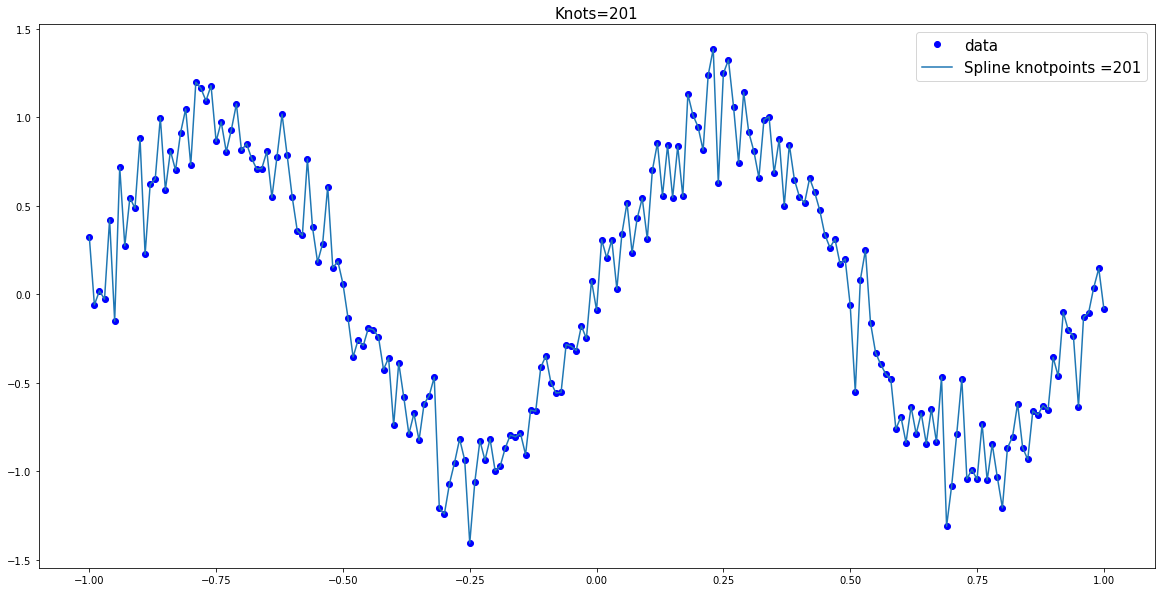

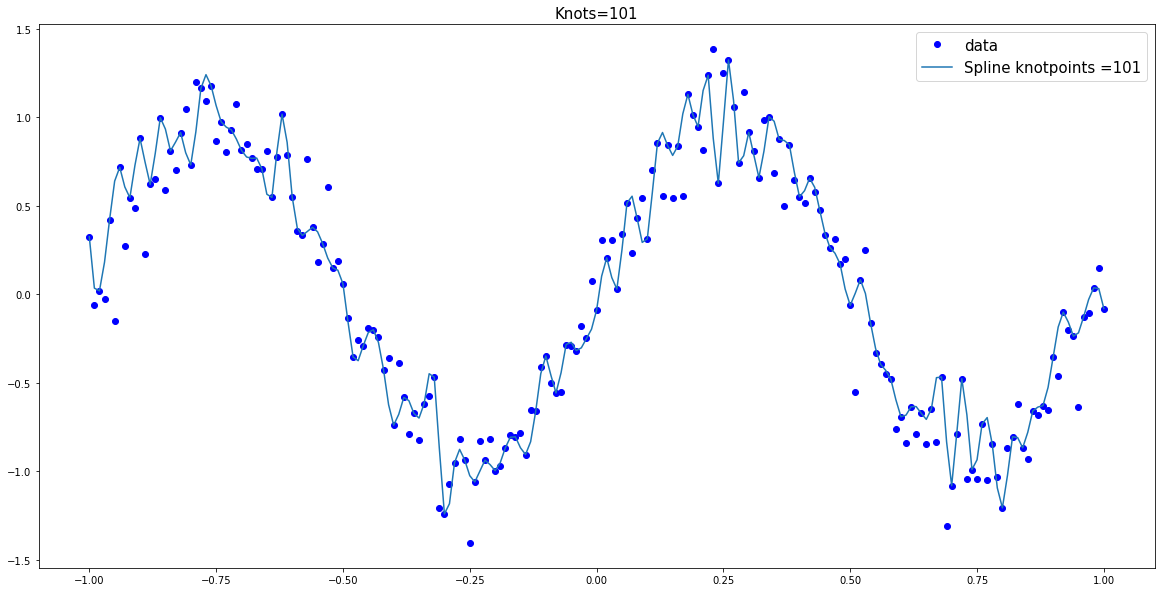

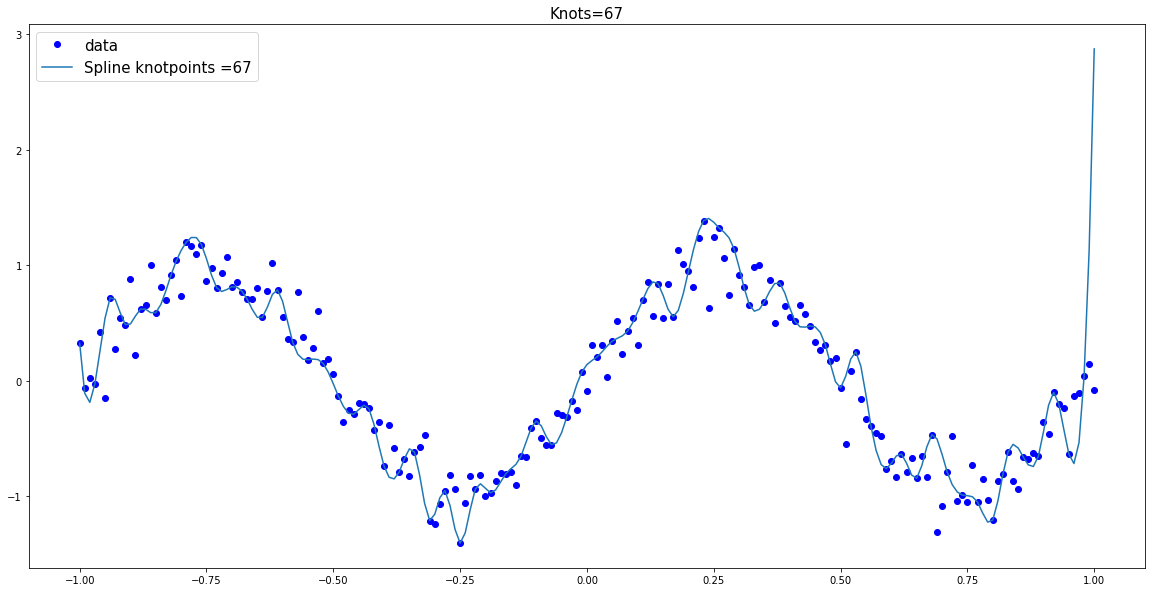

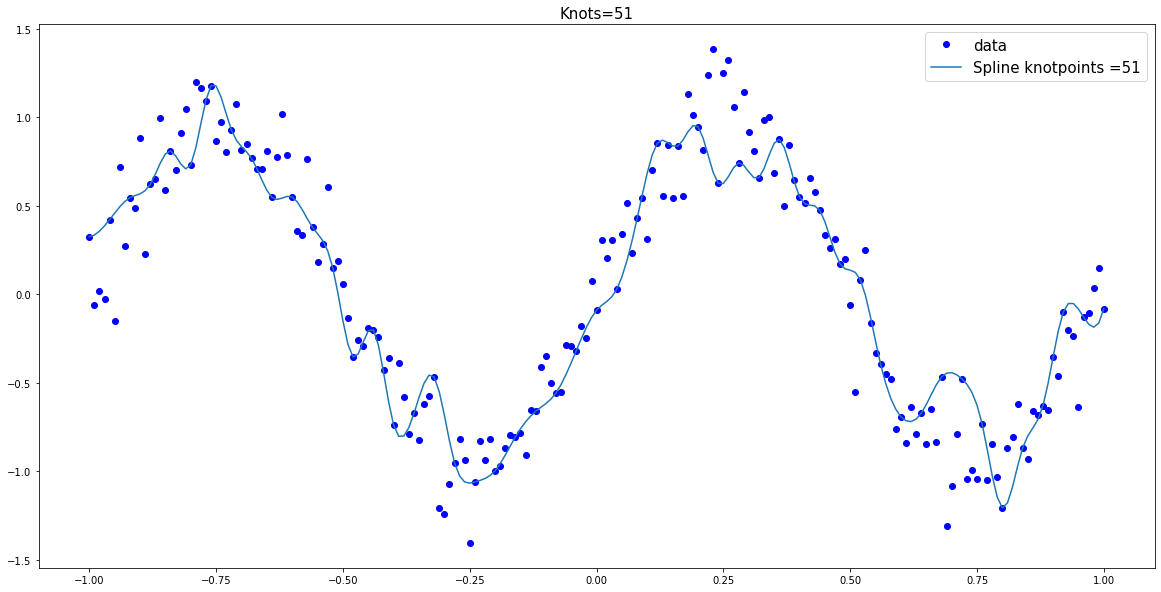

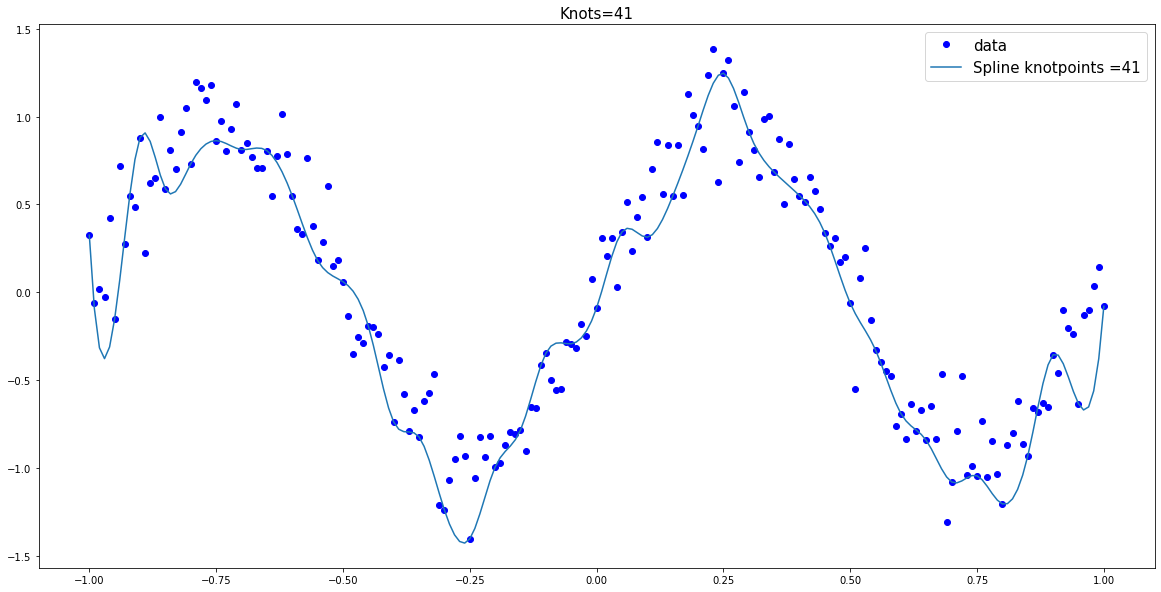

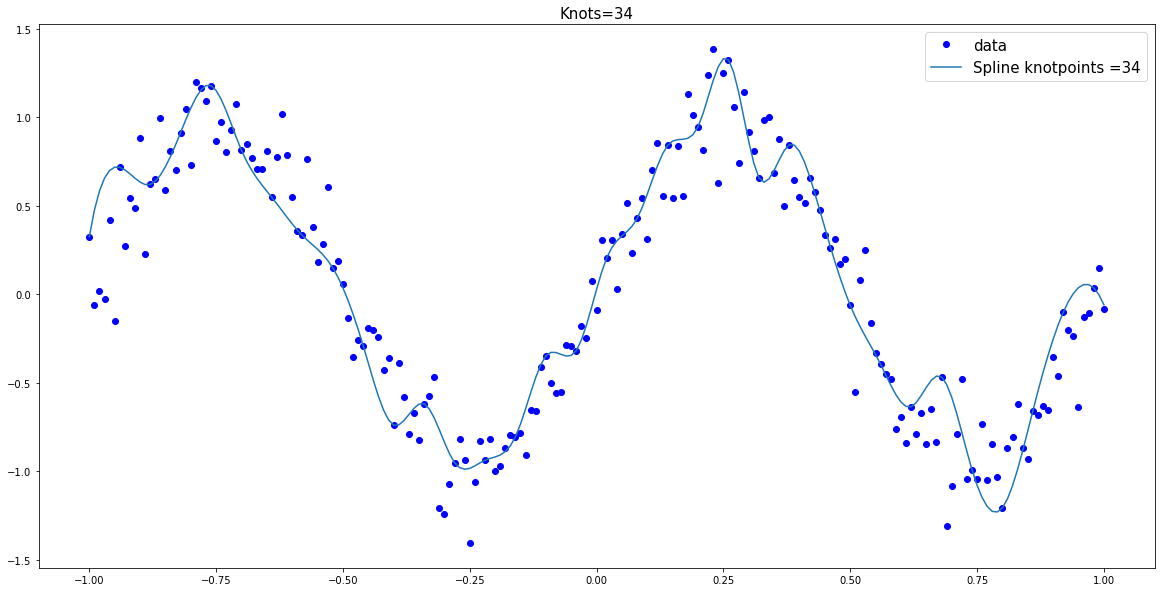

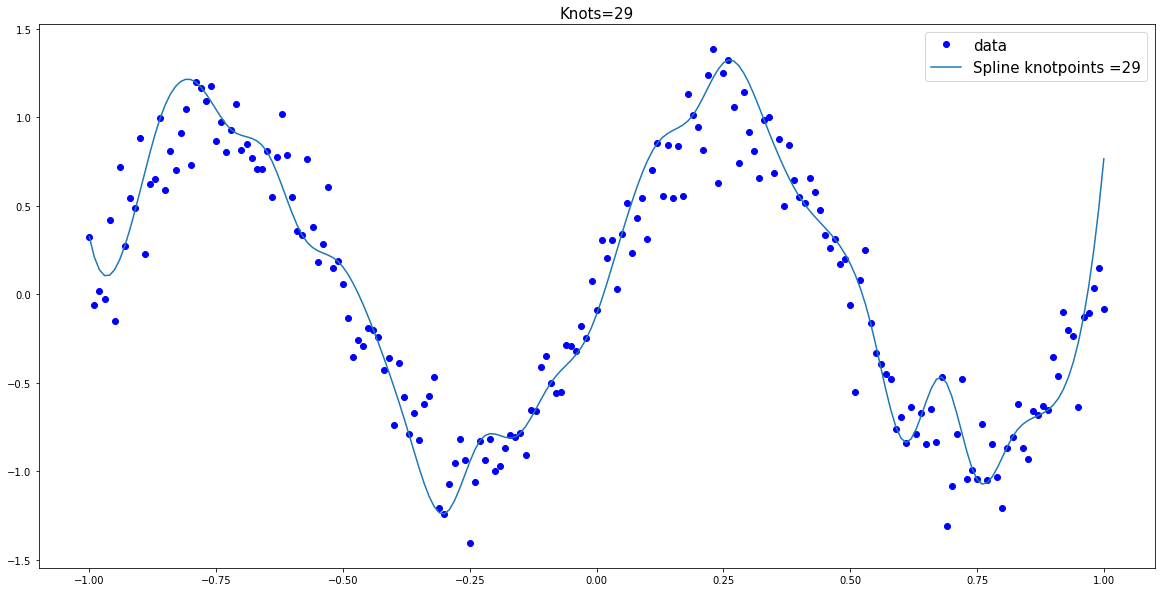

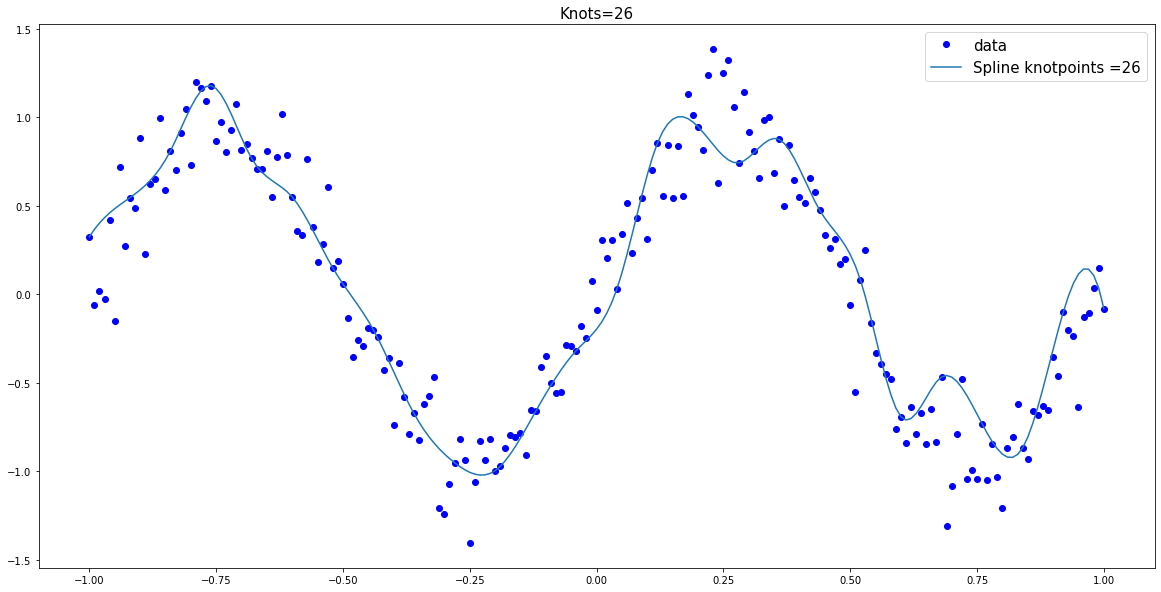

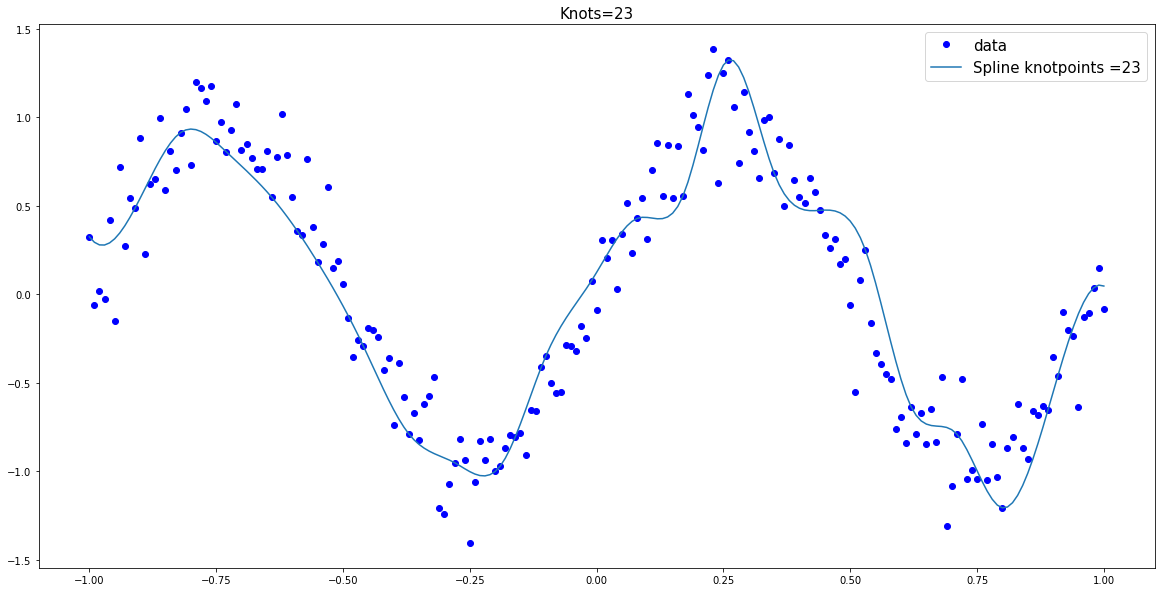

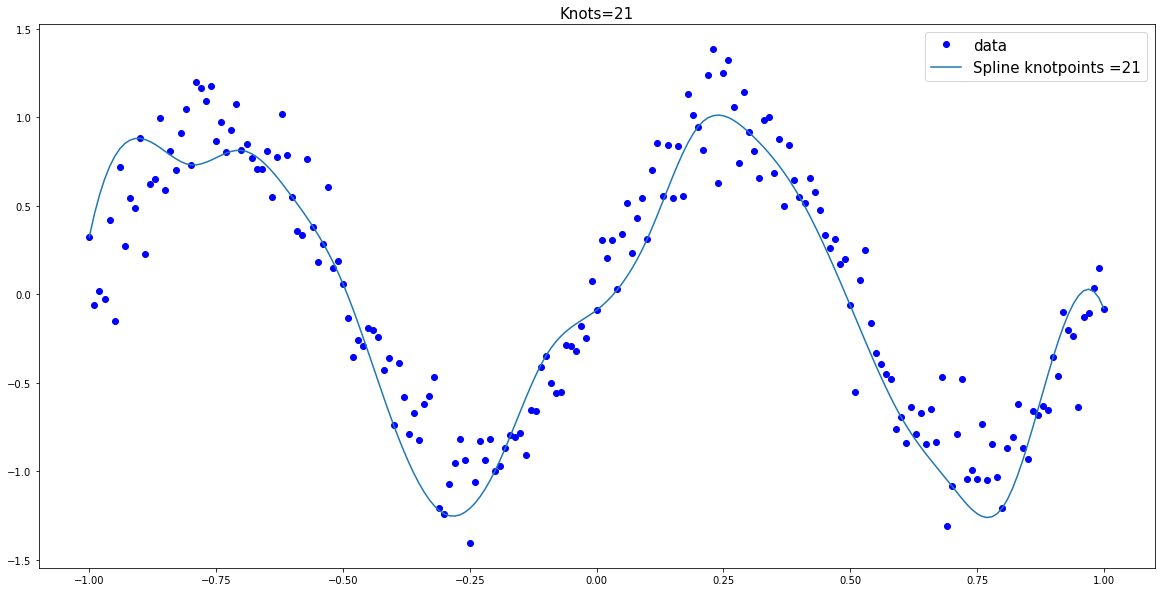

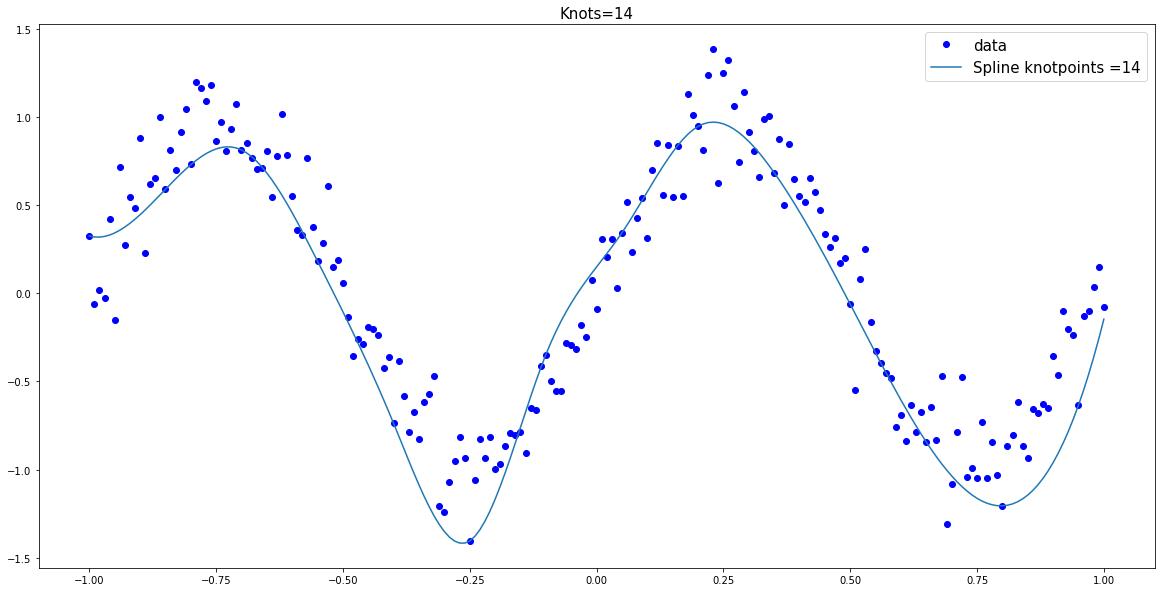

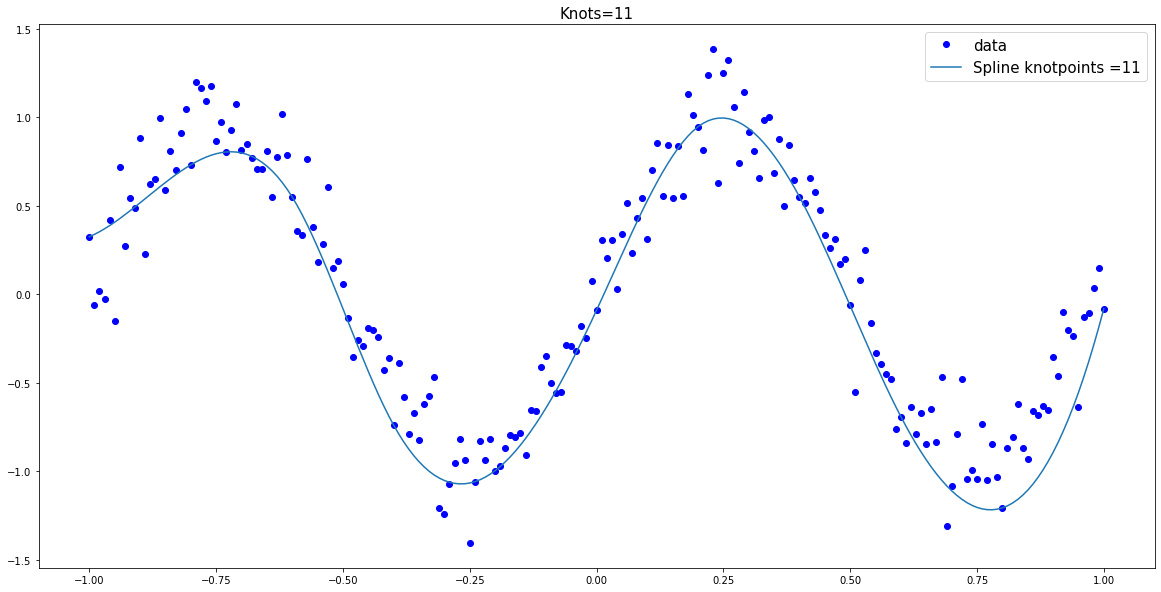

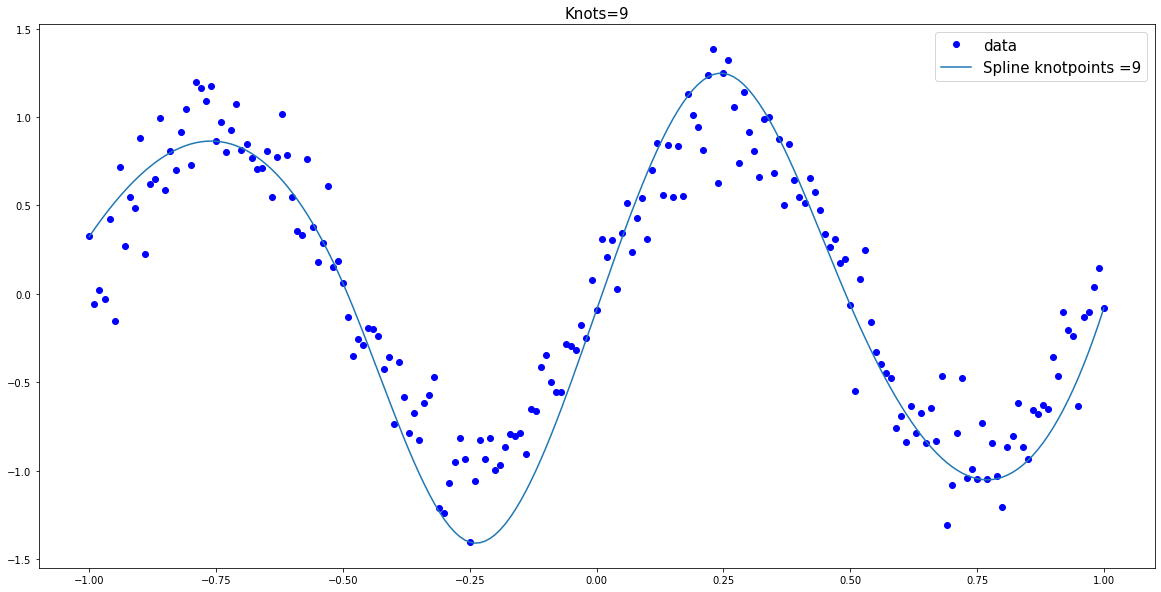

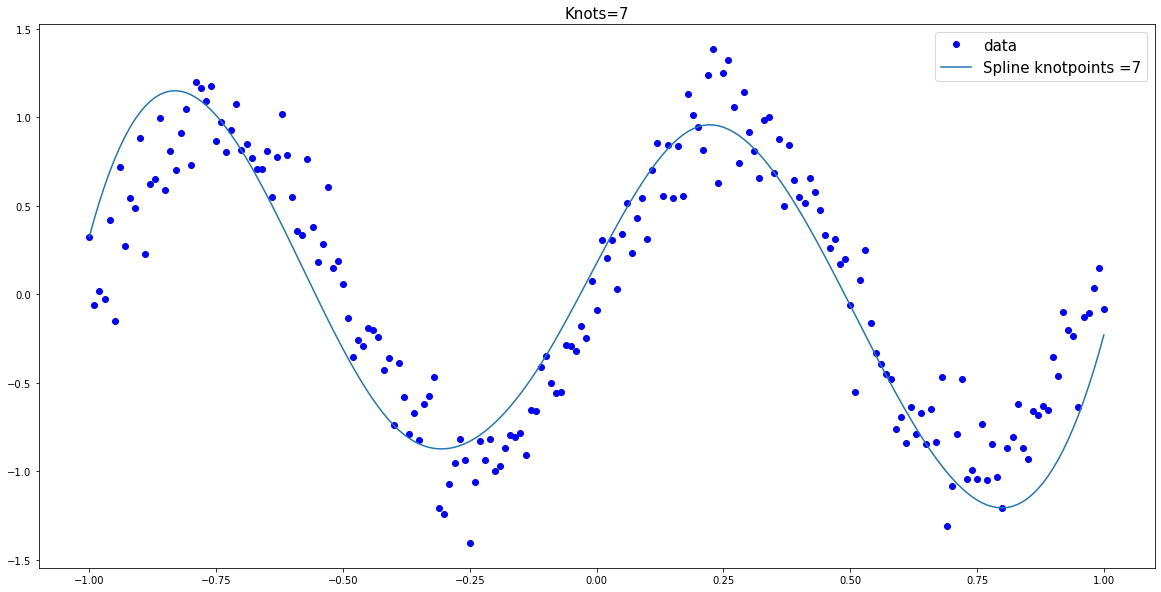

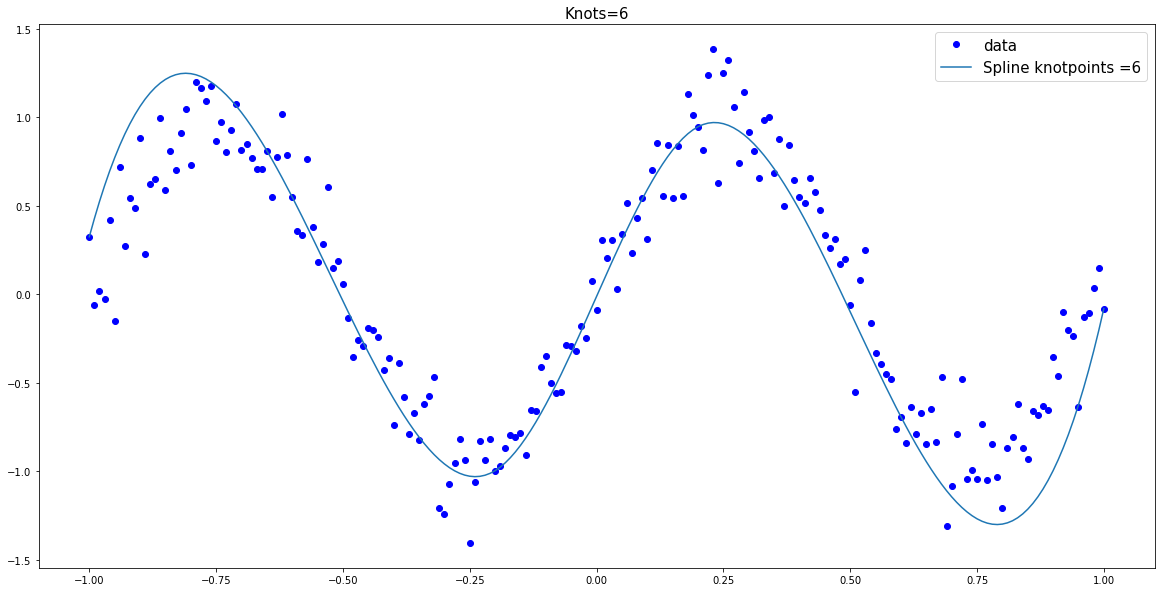

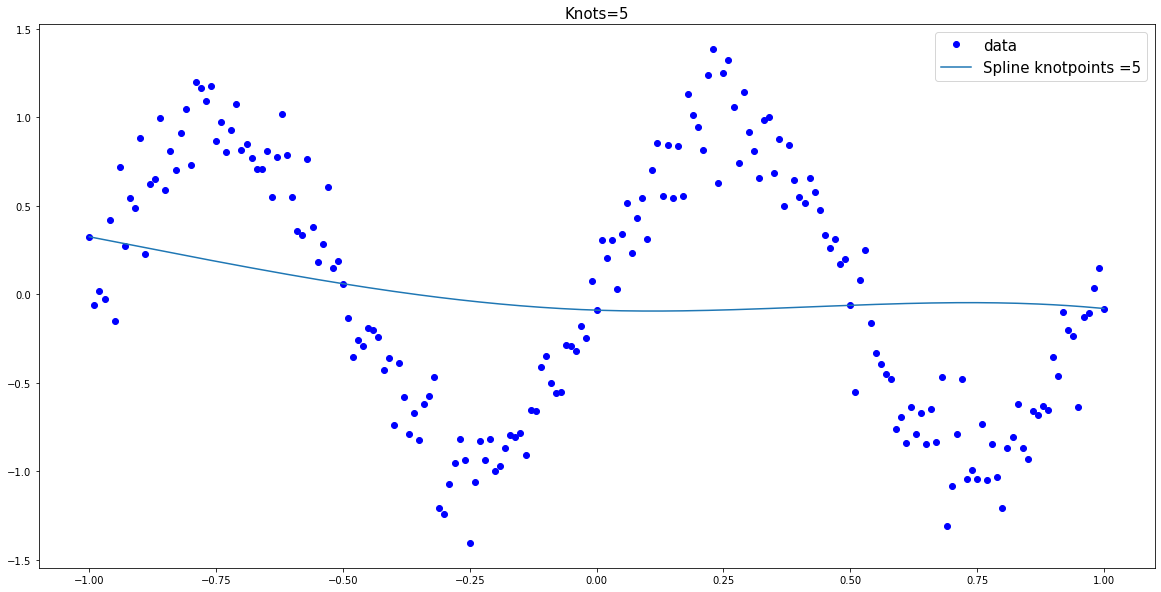

In [32]:
#Now lets fit the above data with cubic spline
from scipy.interpolate import CubicSpline
strides = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,40,50]
trainError = []
testError = []
knotPoints = []
for stride in strides:
    xs = x_train[::stride]
    ys = y_train[::stride]
    knotPoints.append(xs.shape[0])
    cs = CubicSpline(xs, ys)
    
    plt.figure(figsize=(20,10))
    plt.plot(x_train, y_train, 'bo', label='data')
    plt.plot(x_train, cs(x_train), label=f"Spline knotpoints ={xs.shape[0]}")
    y_train_pred = cs(x_train)
    y_test_pred = cs(x_test)
    trainError.append(np.sqrt(np.sum(np.square(y_train_pred - y_train))/y_train.shape[0]))
    testError.append(np.sqrt(np.sum(np.square(y_test_pred - y_test))/y_test.shape[0]))
    plt.title(f'Knots={xs.shape[0]}', fontsize=15)
    plt.legend(fontsize=15)

Text(0.5, 1.0, 'Error as a function of knotpoints')

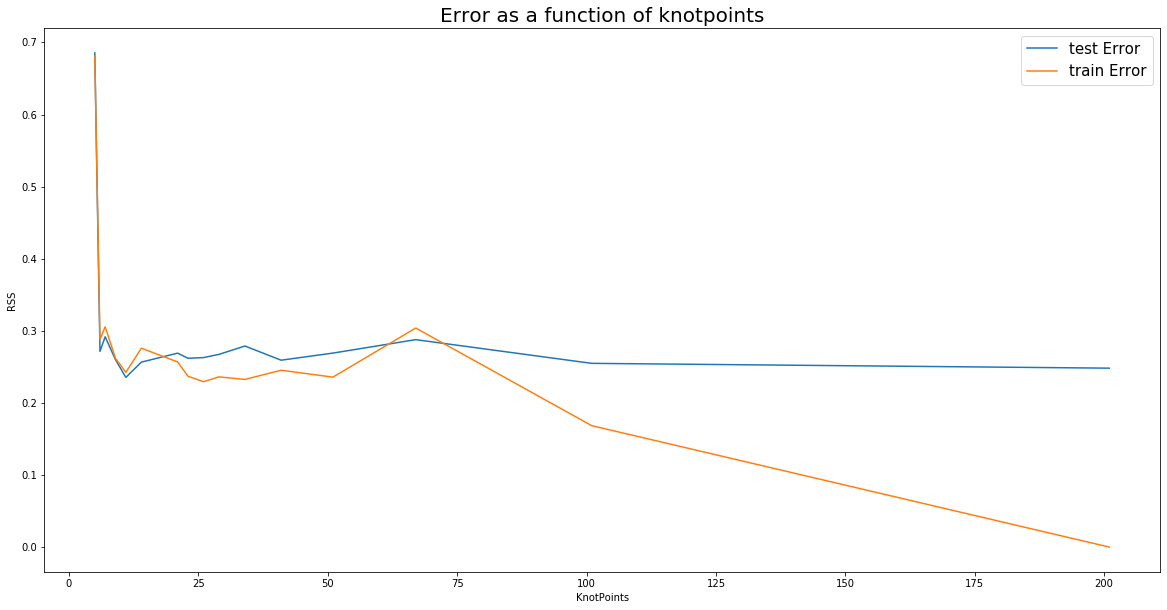

In [42]:
plt.figure(figsize=(20,10))
plt.plot(np.array(knotPoints), testError, label='test Error')
plt.plot(np.array(knotPoints), trainError, label='train Error')
plt.legend(fontsize=15)
plt.ylabel('RSS')
plt.xlabel('KnotPoints')
plt.title('Error as a function of knotpoints', fontsize=20)

In [41]:
print(f"Knotpoints for minimum train error {knotPoints[np.argmin(trainError)]}")
print(f"Knotpoints for minimum test error {knotPoints[np.argmin(testError)]}")

Knotpoints for minimum train error 201
Knotpoints for minimum test error 11


We can see from plots above as we increase knot points train error goes down, but test error doesn't go down. This is classic **Bias vs variance trade off**. With high number of knot points we have high **variance** and with low number of knot points we have high **bias**.

#### Natural splines
**Natural Splines** are cubic splines whose second derivative is set to zero at the end points.

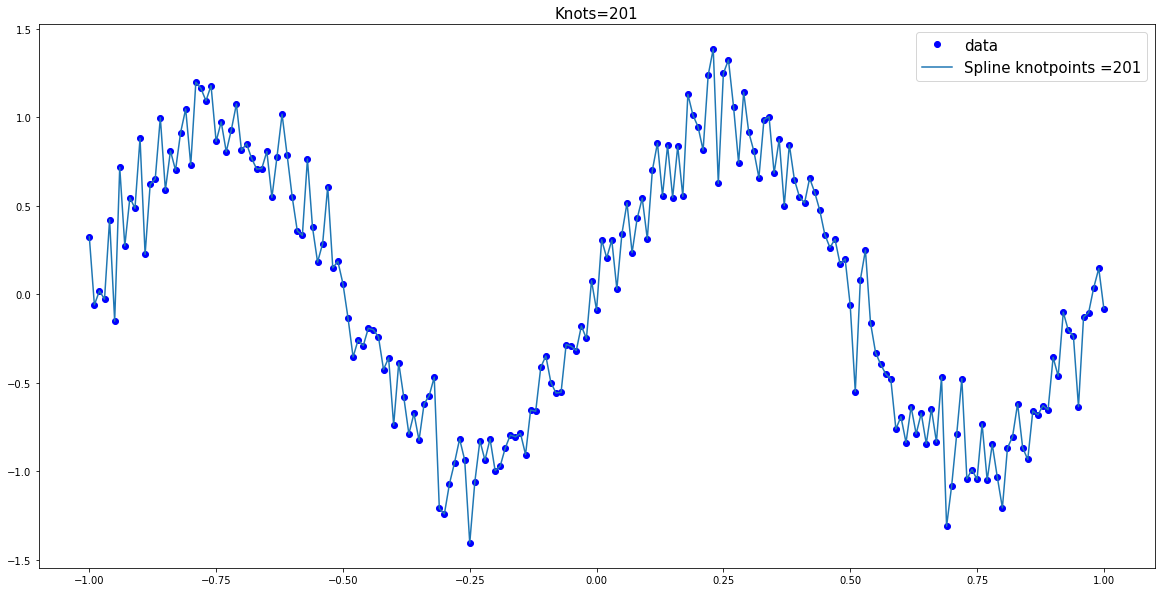

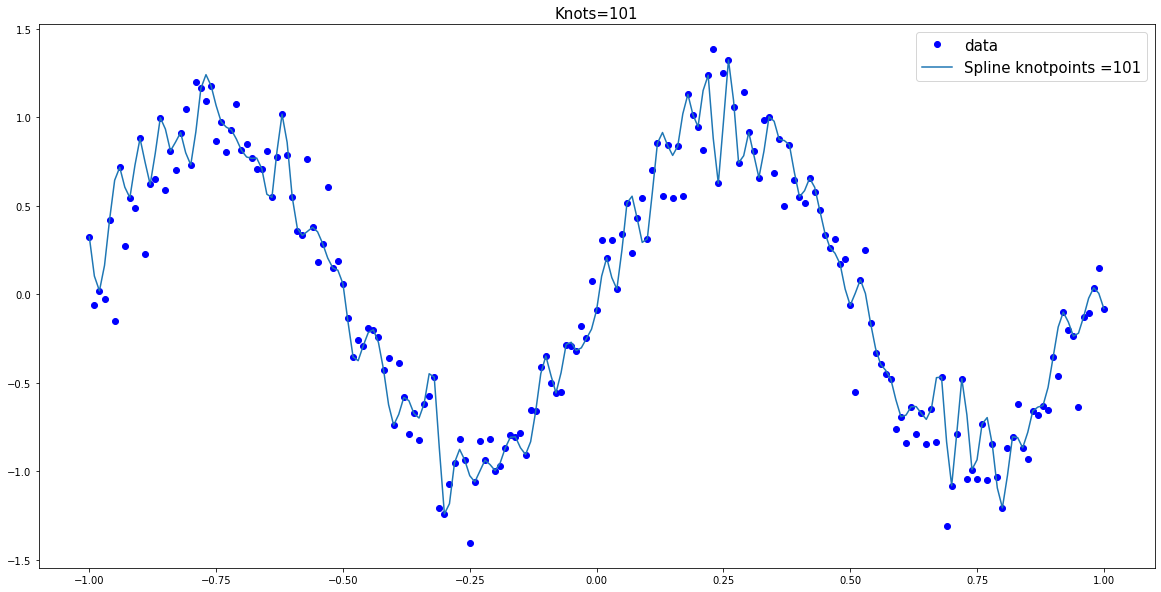

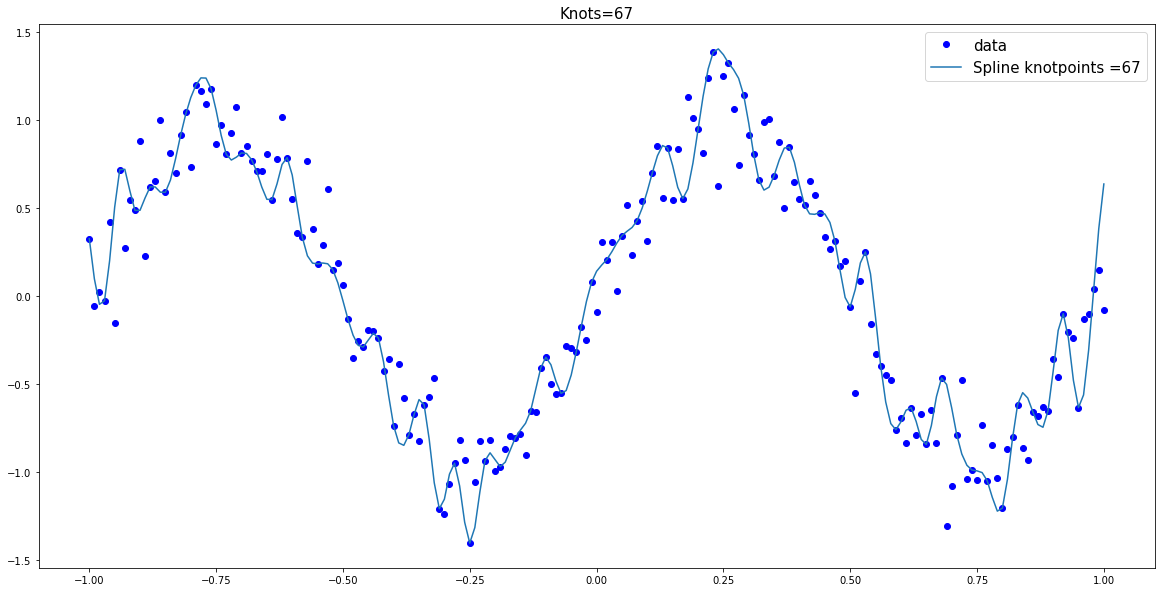

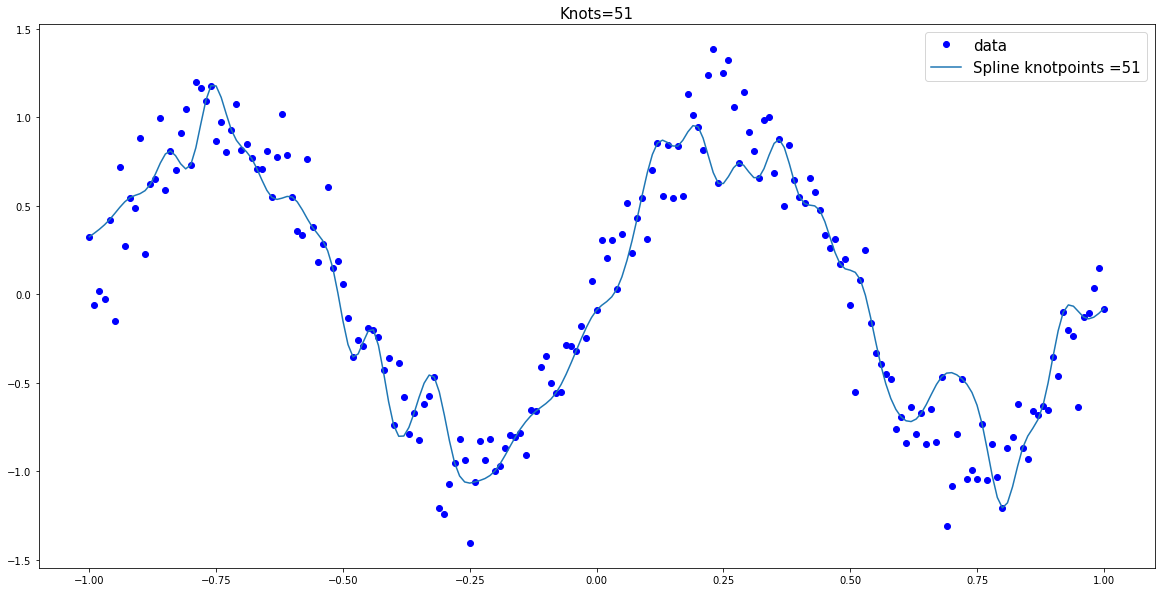

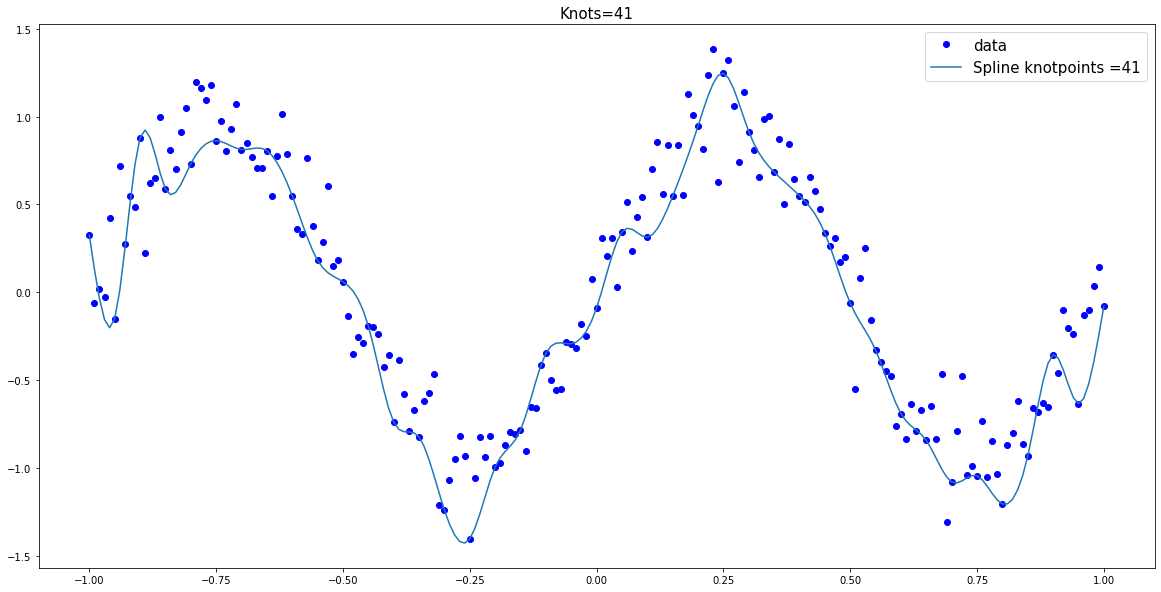

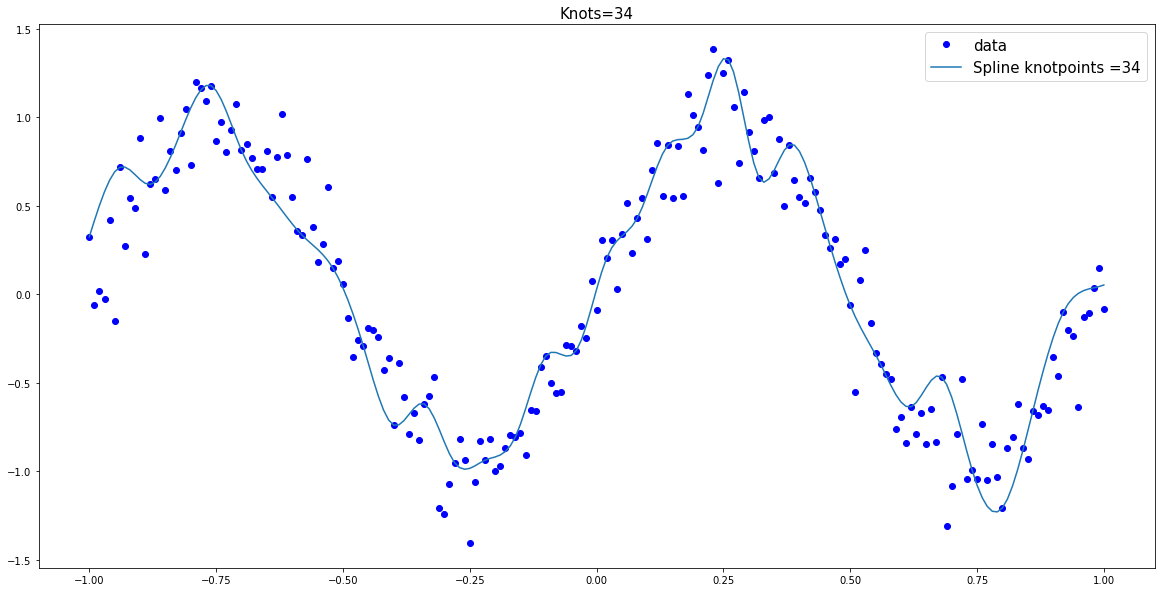

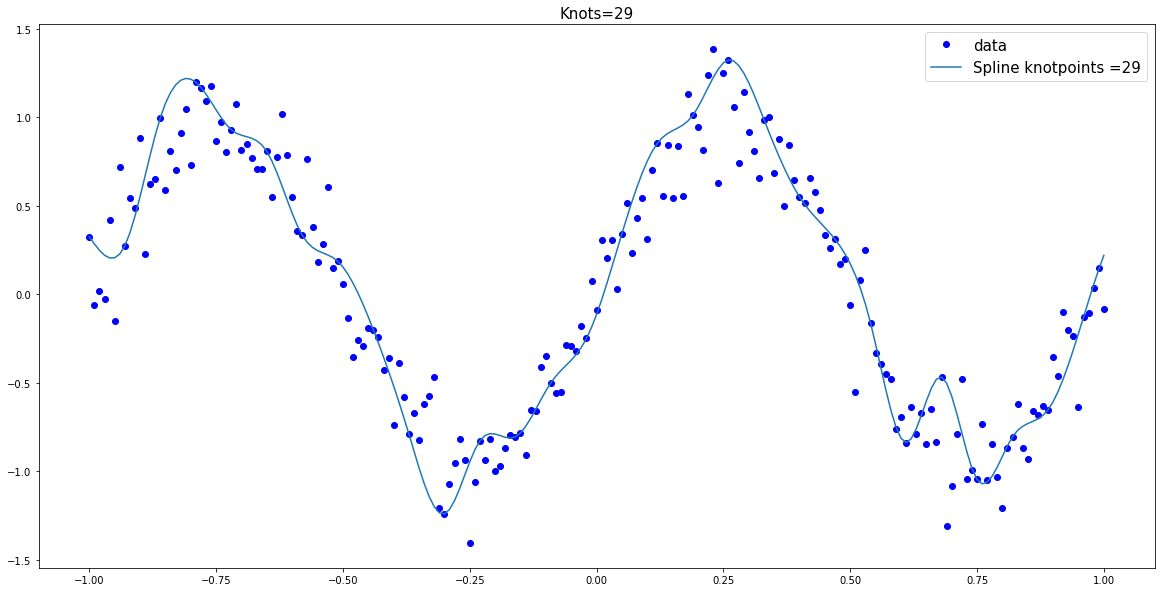

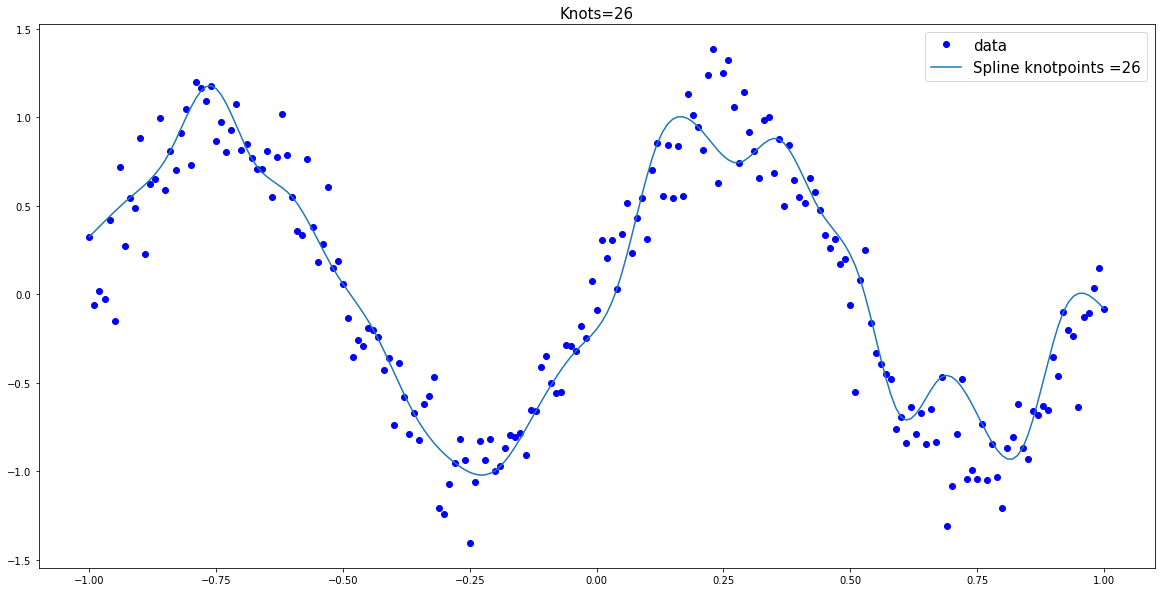

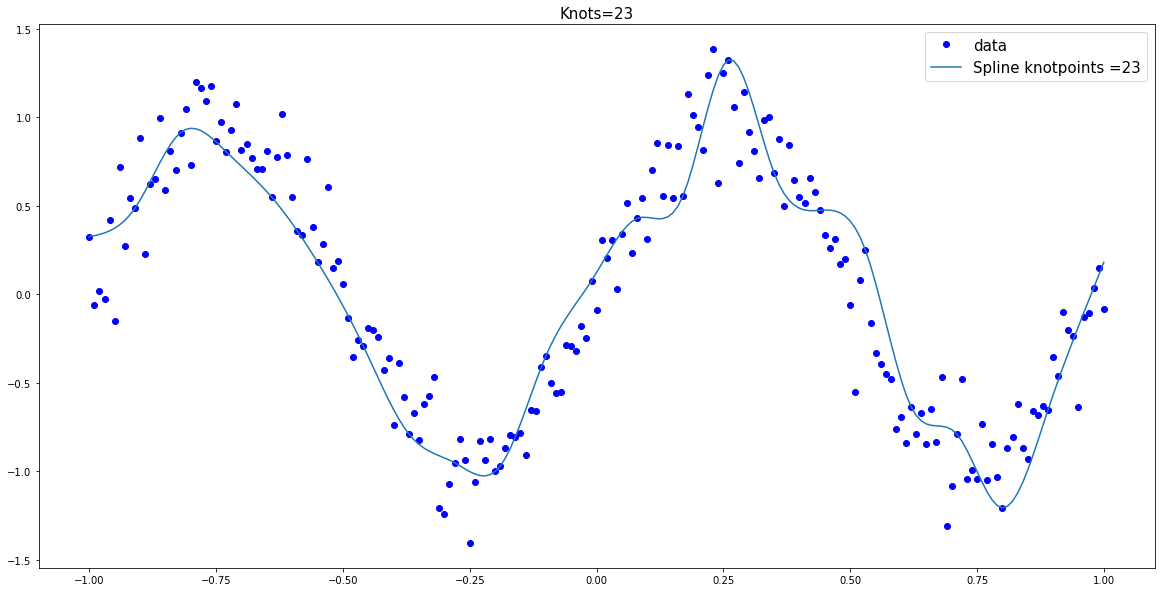

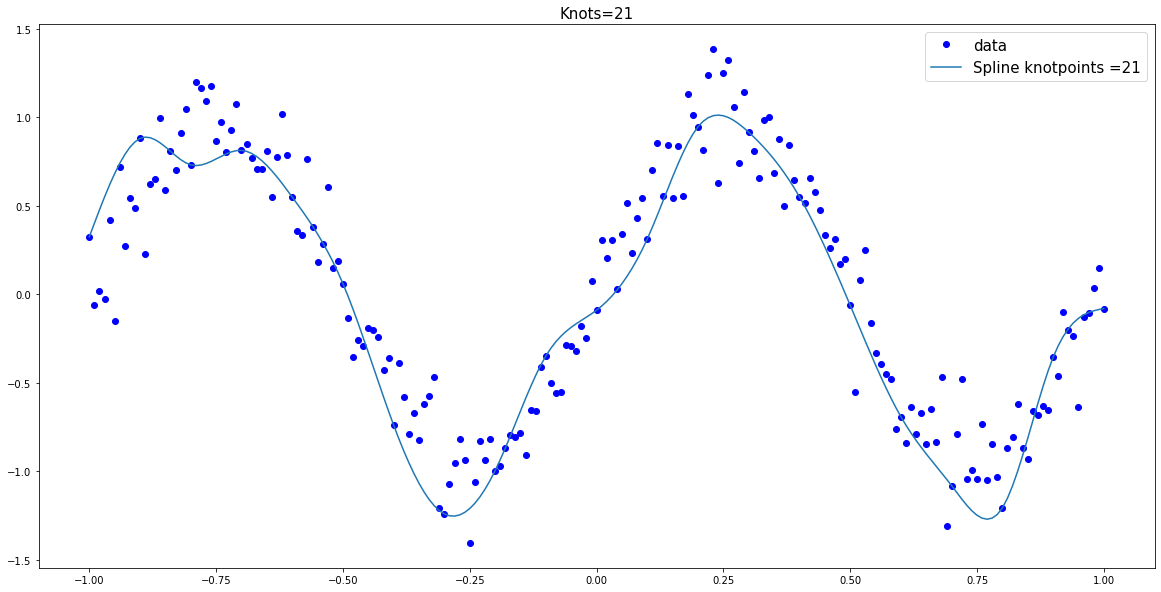

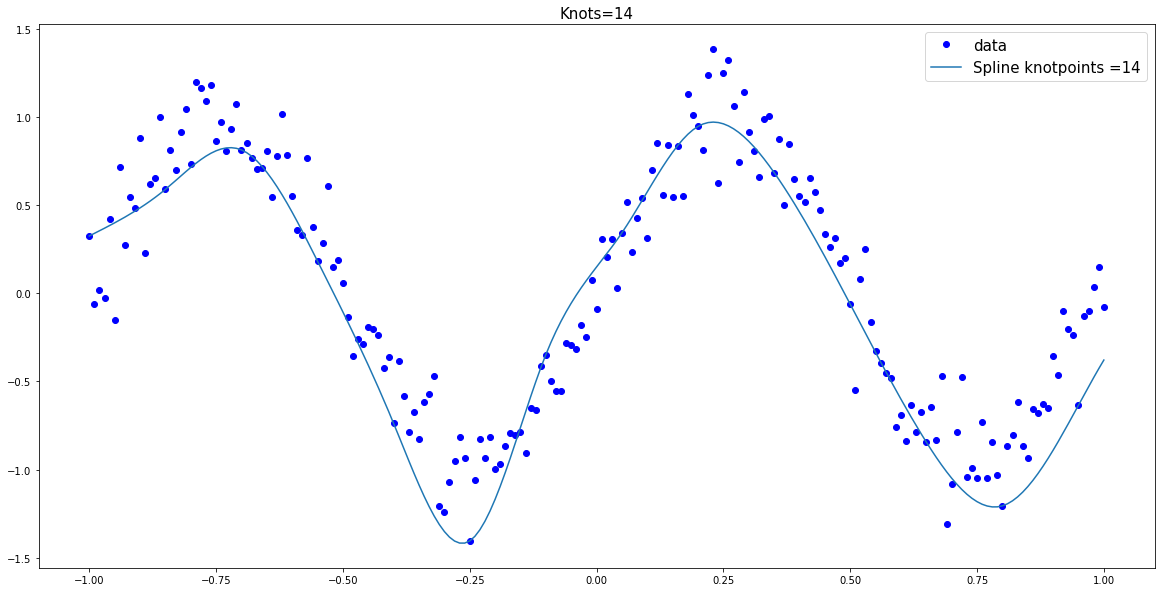

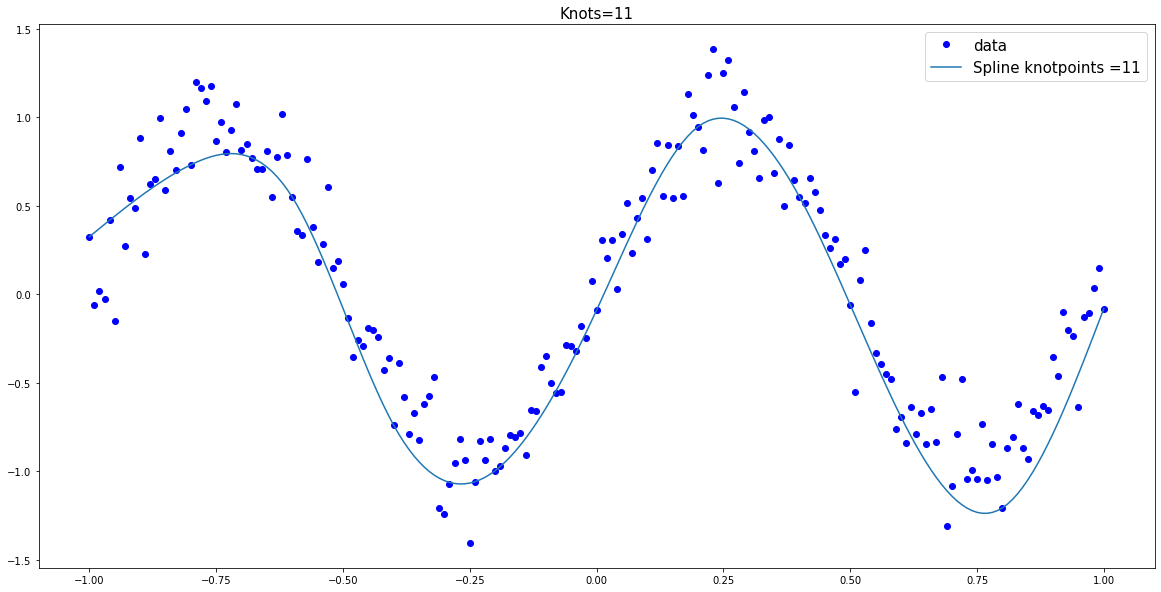

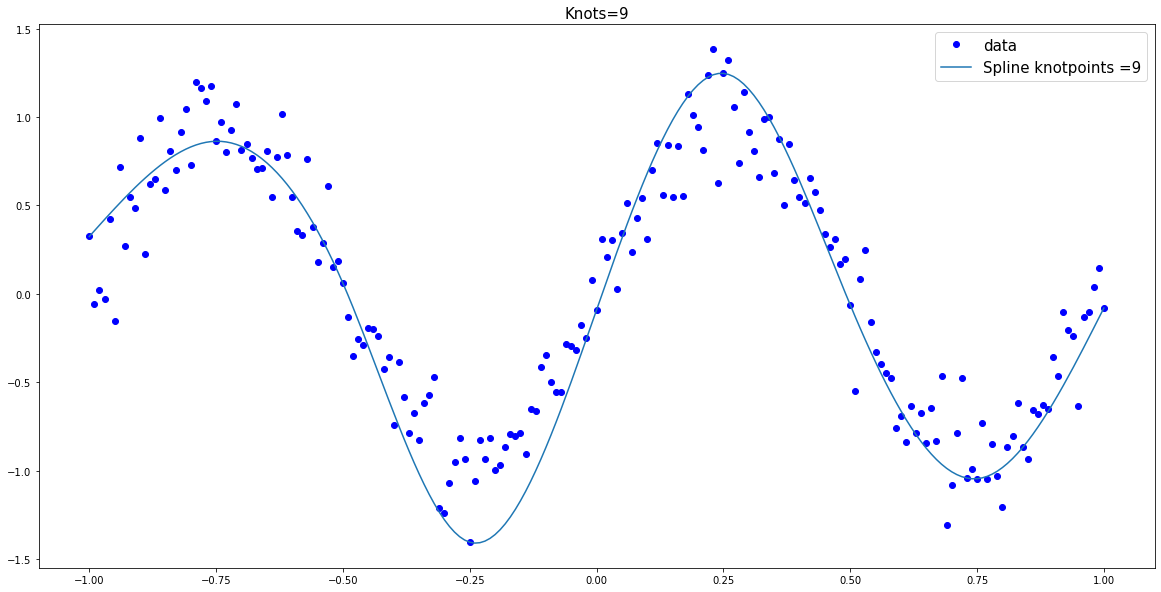

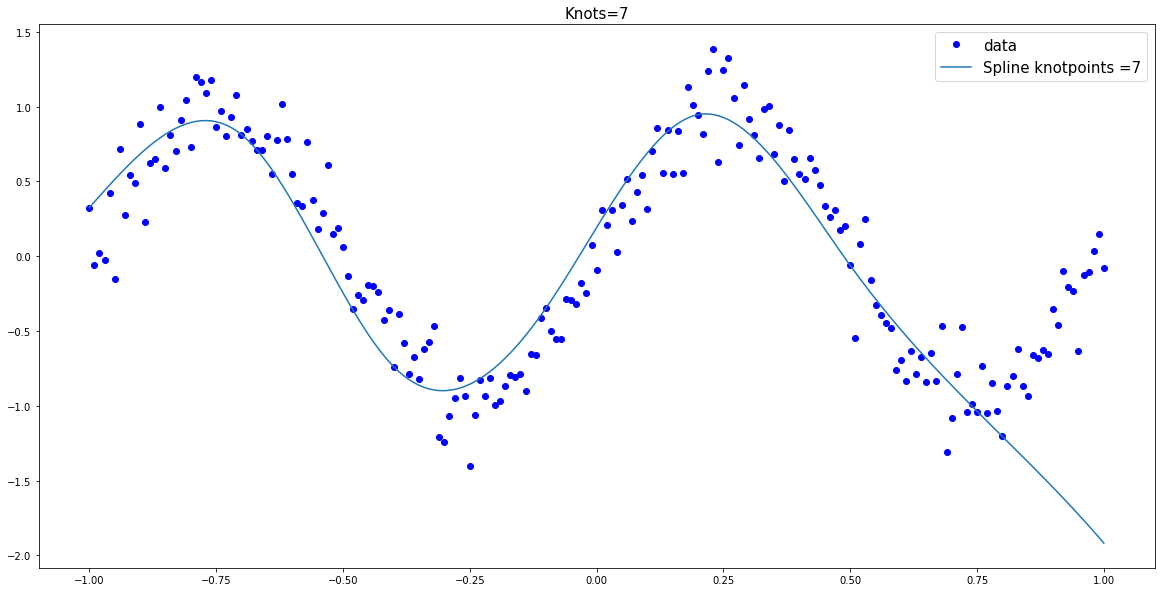

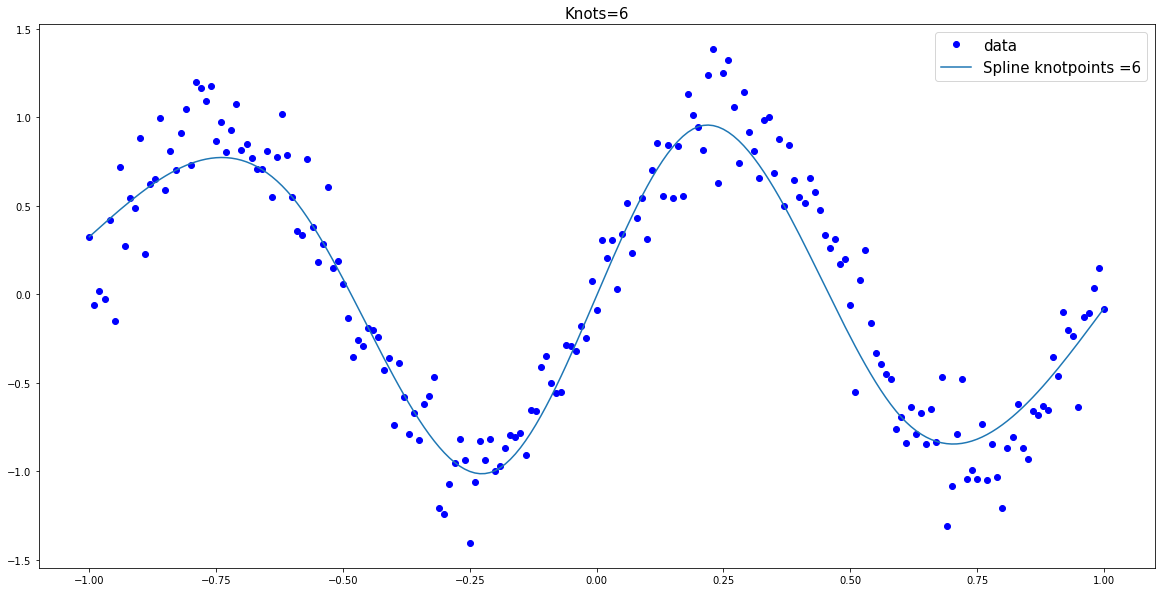

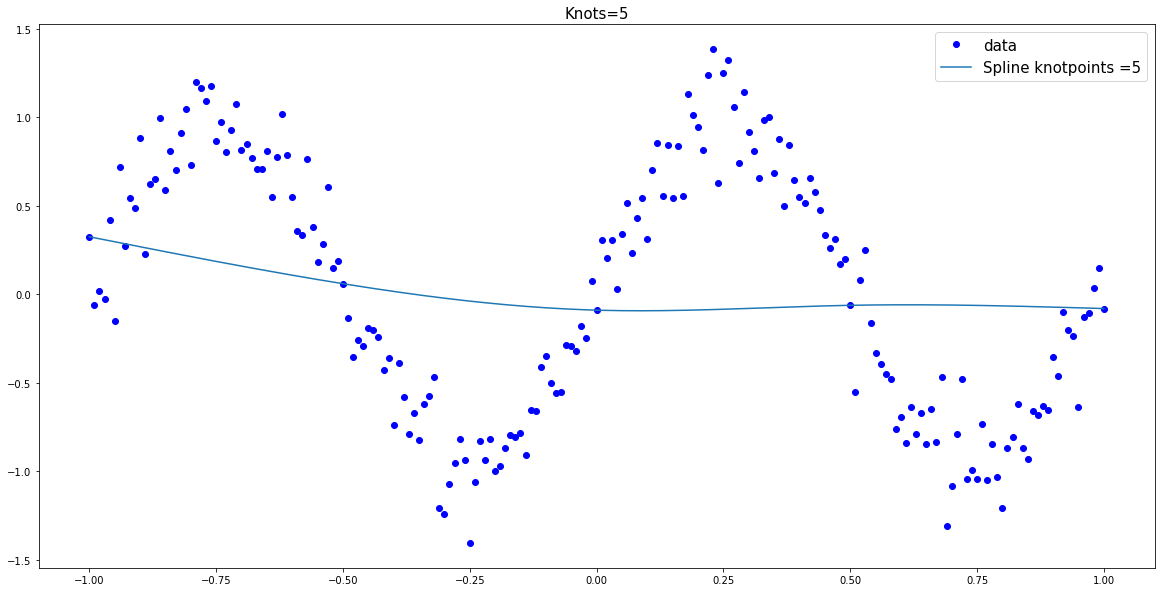

In [43]:
#Now lets fit the above data with cubic spline
from scipy.interpolate import CubicSpline
strides = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,40,50]
trainError = []
testError = []
knotPoints = []
for stride in strides:
    xs = x_train[::stride]
    ys = y_train[::stride]
    knotPoints.append(xs.shape[0])
    cs = CubicSpline(xs, ys, bc_type='natural')
    
    plt.figure(figsize=(20,10))
    plt.plot(x_train, y_train, 'bo', label='data')
    plt.plot(x_train, cs(x_train), label=f"Spline knotpoints ={xs.shape[0]}")
    y_train_pred = cs(x_train)
    y_test_pred = cs(x_test)
    trainError.append(np.sqrt(np.sum(np.square(y_train_pred - y_train))/y_train.shape[0]))
    testError.append(np.sqrt(np.sum(np.square(y_test_pred - y_test))/y_test.shape[0]))
    plt.title(f'Knots={xs.shape[0]}', fontsize=15)
    plt.legend(fontsize=15)

We can see that the end point behavior is slightly different, look at knot = 7 case.